In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [170]:
# Basic Analysis of the raw dataset

pandemic_df = pd.read_csv('dataset/raw_data.csv')
pandemic_df.drop(columns = ['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], axis = 1, inplace = True)
# pandemic_df = pandemic_df[pandemic_df.isna().any(axis=1)]
pandemic_df.shape

(50418, 9)

In [171]:
# convert the 'Date' column to datetime format
pandemic_df['date'] = pd.to_datetime(pandemic_df['date'])
# convert float64 to int64 for total_cases and total_deaths
pandemic_df['total_cases'] = pandemic_df['total_cases'].fillna(0)
pandemic_df['total_cases'] = pandemic_df['total_cases'].astype(np.int64)
pandemic_df['total_deaths'] = pandemic_df['total_deaths'].fillna(0)
pandemic_df['total_deaths'] = pandemic_df['total_deaths'].astype(np.int64)
pandemic_df['stringency_index'] = pandemic_df['stringency_index'].fillna(method='bfill')

# interpolate for missing values
df_inter = pandemic_df.interpolate()
df_inter['month'] = df_inter['date'].dt.month
df_inter['year'] = df_inter['date'].dt.year
pandemic_data = df_inter
# pandemic_data = pd.read_csv('dataset/transformed_pandemic_data2.csv')
pandemic_data.dtypes

iso_code                           object
location                           object
date                       datetime64[ns]
total_cases                         int64
total_deaths                        int64
stringency_index                  float64
population                          int64
gdp_per_capita                    float64
human_development_index           float64
month                               int64
year                                int64
dtype: object

In [172]:
pandemic_data.shape

(50418, 11)

In [173]:
# Rename columns
pandemic_data = pandemic_data.rename(columns = {'location':'loc', 'stringency_index': 'SI', 'population': 'pop', 'gdp_per_capita':'GDP', 'human_development_index': 'HDI'})
pandemic_data.columns

Index(['iso_code', 'loc', 'date', 'total_cases', 'total_deaths', 'SI', 'pop',
       'GDP', 'HDI', 'month', 'year'],
      dtype='object')

In [174]:
index_names = pandemic_data[(pandemic_data['SI'] == 0.0) & (pandemic_data['total_deaths'] == 0) & (pandemic_data['total_cases'] == 0)].index
pandemic_data.drop(index_names, inplace = True)

In [175]:
# Filter out India's data

india_pandemic_data = pandemic_data.loc[pandemic_data['loc'] == 'India']
india_pandemic_data

,iso_code,loc,date,total_cases,total_deaths,SI,pop,GDP,HDI,month,year
21453,IND,India,2020-01-25,0,0,5.56,1380004385,6426.674,0.64,1,2020
21454,IND,India,2020-01-26,0,0,10.19,1380004385,6426.674,0.64,1,2020
21455,IND,India,2020-01-27,0,0,10.19,1380004385,6426.674,0.64,1,2020
21456,IND,India,2020-01-28,0,0,10.19,1380004385,6426.674,0.64,1,2020
21457,IND,India,2020-01-29,0,0,10.19,1380004385,6426.674,0.64,1,2020
...,...,...,...,...,...,...,...,...,...,...,...
21717,IND,India,2020-10-15,7307097,111266,0.00,1380004385,6426.674,0.64,10,2020
21718,IND,India,2020-10-16,7370468,112161,0.00,1380004385,6426.674,0.64,10,2020
21719,IND,India,2020-10-17,7432680,112998,0.00,1380004385,6426.674,0.64,10,2020
21720,IND,India,2020-10-18,7494551,114031,0.00,1380004385,6426.674,0.64,10,2020


In [176]:
india_pandemic_data["cases_daily"]=india_pandemic_data["total_cases"].diff()
india_pandemic_data['cases_daily']=india_pandemic_data['cases_daily'].fillna(0)
india_pandemic_data

<ipython-input-176-f201d47cbb79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_pandemic_data["cases_daily"]=india_pandemic_data["total_cases"].diff()
<ipython-input-176-f201d47cbb79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  india_pandemic_data['cases_daily']=india_pandemic_data['cases_daily'].fillna(0)


,iso_code,loc,date,total_cases,total_deaths,SI,pop,GDP,HDI,month,year,cases_daily
21453,IND,India,2020-01-25,0,0,5.56,1380004385,6426.674,0.64,1,2020,0.0
21454,IND,India,2020-01-26,0,0,10.19,1380004385,6426.674,0.64,1,2020,0.0
21455,IND,India,2020-01-27,0,0,10.19,1380004385,6426.674,0.64,1,2020,0.0
21456,IND,India,2020-01-28,0,0,10.19,1380004385,6426.674,0.64,1,2020,0.0
21457,IND,India,2020-01-29,0,0,10.19,1380004385,6426.674,0.64,1,2020,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21717,IND,India,2020-10-15,7307097,111266,0.00,1380004385,6426.674,0.64,10,2020,67708.0
21718,IND,India,2020-10-16,7370468,112161,0.00,1380004385,6426.674,0.64,10,2020,63371.0
21719,IND,India,2020-10-17,7432680,112998,0.00,1380004385,6426.674,0.64,10,2020,62212.0
21720,IND,India,2020-10-18,7494551,114031,0.00,1380004385,6426.674,0.64,10,2020,61871.0


### Lets create a scatter plot to figure out the if there is a linear relationship between the two variables

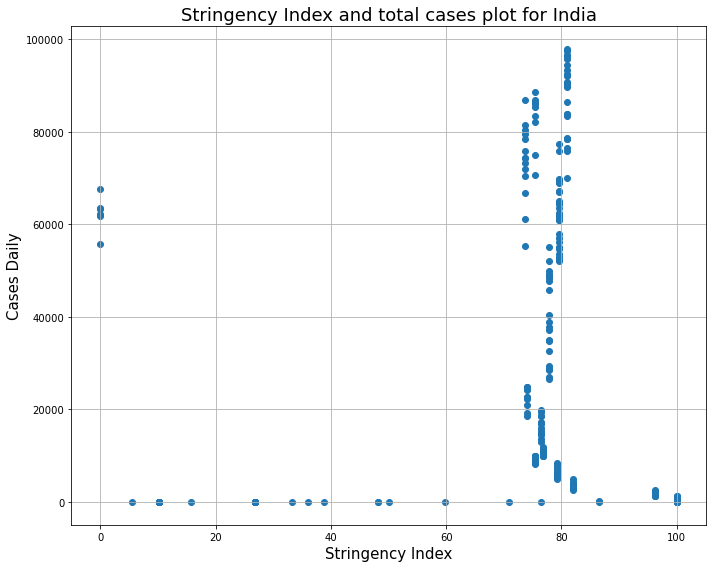

In [177]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 8, forward=True)
# ax.scatter(pandemic_data['SI'], pandemic_data['GDP'])
ax.scatter(india_pandemic_data['SI'], india_pandemic_data['cases_daily'])
ax.set_xlabel('Stringency Index', fontsize=15)
ax.set_ylabel('Cases Daily', fontsize=15)
ax.set_title('Stringency Index and total cases plot for India', fontsize=18)
ax.grid(which='both')
plt.tight_layout()

### Regression variable -
    y is dependant
    x is independant

In [178]:
x = india_pandemic_data['SI']
y = india_pandemic_data['cases_daily']
# y2 = india_pandemic_data['total_deaths']

In [179]:
x

21453     5.56
21454    10.19
21455    10.19
21456    10.19
21457    10.19
         ...  
21717     0.00
21718     0.00
21719     0.00
21720     0.00
21721     0.00
Name: SI, Length: 269, dtype: float64

In [180]:
y

21453        0.0
21454        0.0
21455        0.0
21456        0.0
21457        0.0
          ...   
21717    67708.0
21718    63371.0
21719    62212.0
21720    61871.0
21721    55722.0
Name: cases_daily, Length: 269, dtype: float64

#### Model Validation

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

model = LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, shuffle=True)
x_train = x_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)

print(x_train)
print(y_train)

[[ 79.63]
 [ 77.78]
 [ 75.46]
 [ 81.02]
 [ 75.46]
 [ 79.63]
 [100.  ]
 [ 73.61]
 [ 73.61]
 [ 75.46]
 [ 77.78]
 [ 77.78]
 [ 10.19]
 [100.  ]
 [ 79.63]
 [ 33.33]
 [ 48.15]
 [ 81.94]
 [ 96.3 ]
 [ 86.57]
 [ 81.02]
 [ 77.78]
 [100.  ]
 [ 77.78]
 [ 79.63]
 [ 76.85]
 [ 81.02]
 [ 81.02]
 [100.  ]
 [ 76.39]
 [ 79.17]
 [ 10.19]
 [ 10.19]
 [ 10.19]
 [ 96.3 ]
 [ 77.78]
 [ 79.17]
 [ 26.85]
 [ 96.3 ]
 [ 76.39]
 [ 96.3 ]
 [ 26.85]
 [ 77.78]
 [ 81.02]
 [ 50.  ]
 [ 79.63]
 [ 77.78]
 [ 26.85]
 [ 96.3 ]
 [100.  ]
 [ 79.17]
 [ 75.46]
 [ 96.3 ]
 [ 10.19]
 [ 70.83]
 [ 81.94]
 [ 81.94]
 [ 79.63]
 [ 10.19]
 [ 26.85]
 [ 77.78]
 [ 79.17]
 [ 79.17]
 [ 96.3 ]
 [ 81.94]
 [ 81.02]
 [ 73.61]
 [  5.56]
 [ 77.78]
 [ 10.19]
 [ 79.17]
 [ 81.94]
 [ 73.61]
 [ 15.74]
 [ 10.19]
 [ 10.19]
 [ 79.63]
 [ 75.46]
 [ 74.07]
 [ 81.94]
 [ 79.63]
 [ 81.02]
 [ 76.39]
 [ 73.61]
 [ 96.3 ]
 [ 75.46]
 [ 73.61]
 [ 81.94]
 [ 75.46]
 [ 79.17]
 [ 10.19]
 [ 10.19]
 [ 79.63]
 [100.  ]
 [ 79.63]
 [ 79.63]
 [ 86.57]
 [ 81.94]
 [ 76.85]
 [ 96.3 ]


In [182]:
model.fit(x_train, y_train)

LinearRegression()

In [183]:
model.coef_

array([213.95283601])

In [184]:
model.score(x_train, y_train)

0.04127972492321608

Fitting the dataset into Linear Regression Model

In [185]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [186]:
# calculated co-efficients
regressor.coef_

array([213.95283601])

In [187]:
# predicting
y_pred= regressor.predict(x_test) 
y_pred

array([28423.69306307, 28819.50580968, 29116.90025174, 27927.32248353,
       28819.50580968, 13962.62087725, 33177.72507918, 28224.71692558,
       33177.72507918, 28224.71692558, 27531.50973691, 13962.62087725,
       28423.69306307, 33177.72507918, 27629.92804148, 27531.50973691,
       11782.44147833, 28819.50580968, 29116.90025174, 13962.62087725,
       28819.50580968, 27927.32248353, 33177.72507918, 32386.09958595,
       28819.50580968, 27531.50973691, 29313.73686086, 33177.72507918,
       27927.32248353, 32386.09958595, 29313.73686086, 28819.50580968,
       27531.50973691, 29116.90025174, 27927.32248353, 29116.90025174,
       13962.62087725, 32386.09958595, 29116.90025174, 29116.90025174,
       28224.71692558, 28126.29862102, 29116.90025174, 13962.62087725,
       19508.27838659, 29116.90025174, 13962.62087725, 28423.69306307,
       28819.50580968, 13962.62087725, 28721.08750512, 27927.32248353,
       13962.62087725, 28423.69306307])

In [188]:
print('Train Score: ', regressor.score(x_train, y_train))  
print('Test Score: ', regressor.score(x_test, y_test))

Train Score:  0.04127972492321608
Test Score:  -0.019135354805019267


In [189]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)

1279868091.965441

In [190]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

# Feature Selection using correlation

In [191]:
# feature selection
f_selector = SelectKBest(score_func=f_regression, k='all')

In [192]:
# learn relationship from training data
f_selector.fit(x_train, y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x1230df0d0>)

In [193]:
# transform train input data
x_train_fs = f_selector.transform(x_train)
# transform test input data
x_test_fs = f_selector.transform(x_test)

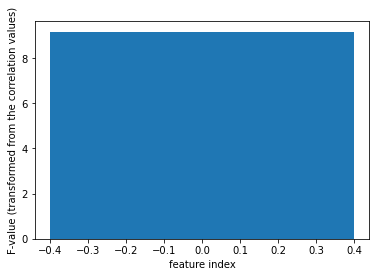

In [194]:
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("F-value (transformed from the correlation values)")
plt.show()